1. Sentences

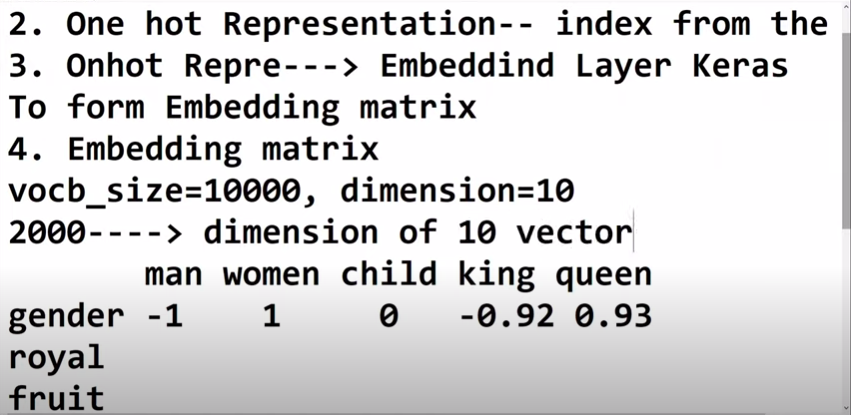

## https://gist.github.com/kidpixo/f4318f8c8143adee5b40

## https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

## *** https://towardsdatascience.com/natural-language-processing-with-tensorflow-e0a701ef5cef

## <span style="color:red">https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb </span>

In [1]:
from tensorflow.keras.preprocessing.text import one_hot

In [11]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [12]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

# One Hot Representation 

Keras provides the one_hot() function that you can use to tokenize and integer encode a text document in one step. The name suggests that it will create a one-hot encoding of the document, which is not the case.

one_hot() function will make the <b>text lower case, filter out punctuation, and split words based on white space.</b>



In [13]:
# vocabulary size
vocabulary_size = 10000
onehot_repr = [one_hot(words, vocabulary_size) for words in sent]
# the glass of - is same for 1st &2nd sentences, so same index is returned.
print(onehot_repr)

[[5503, 8773, 5060, 4623], [5503, 8773, 5060, 1569], [5503, 5902, 5060, 4371], [2382, 1938, 1949, 1967, 958], [2382, 1938, 1949, 1967, 1668], [6482, 5503, 6924, 5060, 1892], [5329, 9160, 2220, 1967]]


# Word Embedding Representation

In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import numpy as np

If padding is to be done after the sentence, the hyperparameter padding can be set to ‘post’. Padding is generally done with reference to the longest sentence, however the hyperparameter maxlen can be provided to override it and define the maximum length of the sentence. Now, with the knowledge of maxlen one may wonder if information is lost as only a certain length of the sentence is taken. This is true but one can specify from where the words are omitted. Setting it to ‘post’ allows one to loose words from the end of the sentence.

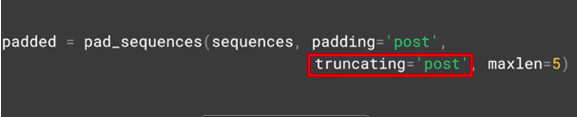

In [17]:
# We are converting sentences to same length(10) with pre padding which will prepend sentences with 0 if less than 10
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=10)
print(embedded_docs)

[[   0    0    0    0    0    0 5503 8773 5060 4623]
 [   0    0    0    0    0    0 5503 8773 5060 1569]
 [   0    0    0    0    0    0 5503 5902 5060 4371]
 [   0    0    0    0    0 2382 1938 1949 1967  958]
 [   0    0    0    0    0 2382 1938 1949 1967 1668]
 [   0    0    0    0    0 6482 5503 6924 5060 1892]
 [   0    0    0    0    0    0 5329 9160 2220 1967]]


In [18]:
# Padding without maxlength - It will take max length of longest sentences(5 in our case)
embedded_docs1 = pad_sequences(onehot_repr,padding='pre')
print(embedded_docs1)

[[   0 5503 8773 5060 4623]
 [   0 5503 8773 5060 1569]
 [   0 5503 5902 5060 4371]
 [2382 1938 1949 1967  958]
 [2382 1938 1949 1967 1668]
 [6482 5503 6924 5060 1892]
 [   0 5329 9160 2220 1967]]


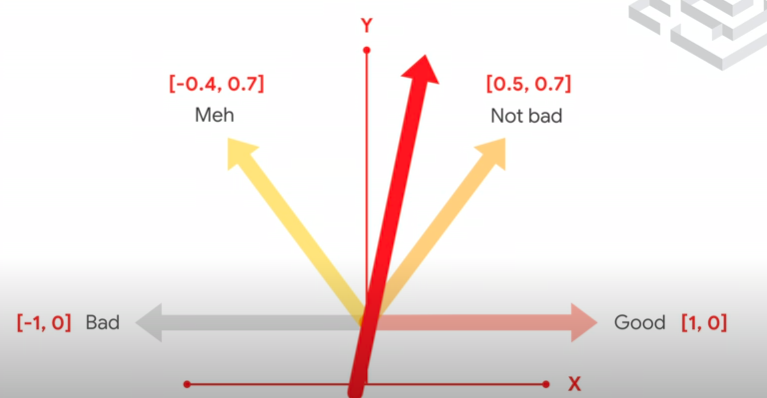

Embedding layer will plot encoded words(vector) to graph as above which will predict the result. Direction of each word is learnt on epoch by epoch

In [23]:
model = Sequential()
# Convert it to 10 dimensions, if i/p length isn't given, it takes sentence with high length
#Turns positive integers (indexes) into dense vectors of fixed size.
#e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`
#This layer can only be used as the first layer in a model.
model.add(Embedding(vocabulary_size,10))
model.compile(optimizer='adam',loss='mse')

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 10)          100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(model.predict(embedded_docs))

[[[ 0.04330784 -0.00741015 -0.00597499  0.01311913  0.03420133
   -0.00385886  0.03299085  0.01264378 -0.00328115  0.03192914]
  [-0.02613737  0.00564655 -0.02444668 -0.01361636 -0.03523313
   -0.03310118  0.01456522 -0.00387079 -0.02085965  0.0344439 ]
  [-0.0123134   0.02543296  0.04956796  0.04305999  0.00557456
   -0.02016383  0.00152346  0.0066036   0.01117543  0.02831651]
  [-0.01334967 -0.00646125  0.03839898  0.03547505  0.04137849
   -0.0377779  -0.04312139 -0.04691469 -0.0005245   0.04460323]
  [ 0.02713851 -0.02458729  0.0091719   0.04649327  0.03486861
   -0.02885721 -0.00376163 -0.03639577  0.04059169 -0.01692765]]

 [[ 0.04330784 -0.00741015 -0.00597499  0.01311913  0.03420133
   -0.00385886  0.03299085  0.01264378 -0.00328115  0.03192914]
  [-0.02613737  0.00564655 -0.02444668 -0.01361636 -0.03523313
   -0.03310118  0.01456522 -0.00387079 -0.02085965  0.0344439 ]
  [-0.0123134   0.02543296  0.04956796  0.04305999  0.00557456
   -0.02016383  0.00152346  0.0066036   0.0111

In [26]:
embedded_docs[0]

array([   0, 5503, 8773, 5060, 4623], dtype=int32)

In [29]:
# It converts each word in the sentence to 10 dimensional array
print(model.predict(embedded_docs)[0])

[[ 0.04330784 -0.00741015 -0.00597499  0.01311913  0.03420133 -0.00385886
   0.03299085  0.01264378 -0.00328115  0.03192914]
 [-0.02613737  0.00564655 -0.02444668 -0.01361636 -0.03523313 -0.03310118
   0.01456522 -0.00387079 -0.02085965  0.0344439 ]
 [-0.0123134   0.02543296  0.04956796  0.04305999  0.00557456 -0.02016383
   0.00152346  0.0066036   0.01117543  0.02831651]
 [-0.01334967 -0.00646125  0.03839898  0.03547505  0.04137849 -0.0377779
  -0.04312139 -0.04691469 -0.0005245   0.04460323]
 [ 0.02713851 -0.02458729  0.0091719   0.04649327  0.03486861 -0.02885721
  -0.00376163 -0.03639577  0.04059169 -0.01692765]]
